In [1]:
%matplotlib inline
# Dependencies
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key
from datetime import datetime
import time
from scipy.stats import linregress


In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [3]:
lat_lags = zip(lats, lngs)

In [4]:
#print coordinates from the zip lat/long file
coordinates = list(lat_lngs)
print(coordinates[:50])

[(-12.920972261853237, 149.4610496114562), (79.77791095492978, 151.54788577558622), (37.54917857204856, 19.220687037237525), (-75.15951663052282, -29.81930313280469), (64.29453834769754, 127.52564876991232), (-84.79071877076525, 68.56245074664139), (-80.09187051061403, 57.899866910845475), (-3.4435468163423053, 98.7905172863122), (-39.644914637135734, 101.70736249094006), (-40.433488215165134, 140.72424820955382), (23.43510232972379, -125.46678589447524), (-21.329074264985778, -99.49966641614726), (-44.12696714412947, -139.26937607942196), (-61.60897560628383, 100.86232192897916), (-68.35036934235633, -79.7437769618773), (55.84197927095357, 179.53077712033536), (-24.85762813634412, 126.30292213262817), (-76.06535619835111, 131.16581037975078), (5.1665340110169495, 97.99408854661448), (44.76736424944363, -156.08590258963503), (-89.0307570348071, -163.9679999479208), (83.89121986440318, -175.21752930881135), (79.89068692353865, 68.39899786562688), (71.69495261965596, 27.472200611916634),

In [5]:
cities = list()

for x in coordinates:
    cities_name = citipy.nearest_city(x[0], x[1]).city_name
    if cities_name not in cities:
        cities.append(cities_name)
print(cities[:10],len(cities))

['samarai', 'chokurdakh', 'lixourion', 'ushuaia', 'sangar', 'taolanaro', 'east london', 'sungaipenuh', 'busselton', 'portland'] 629


In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f8a8f3743cd9de275d97a88345ed6688


In [7]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1


# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city
    city_weather = requests.get(city_url)
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | samarai
Processing Record 2 of Set 1 | chokurdakh
Processing Record 3 of Set 1 | lixourion
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | sangar
Processing Record 6 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 7 of Set 1 | east london
Processing Record 8 of Set 1 | sungaipenuh
Processing Record 9 of Set 1 | busselton
Processing Record 10 of Set 1 | portland
Processing Record 11 of Set 1 | san quintin
Processing Record 12 of Set 1 | puerto ayora
Processing Record 13 of Set 1 | rikitea
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | beringovskiy
Processing Record 16 of Set 1 | yulara
Processing Record 17 of Set 1 | new norfolk
Processing Record 18 of Set 1 | langsa
Processing Record 19 of Set 1 | kodiak
Processing Record 20 of Set 1 | mataura
Processing Record 21 of Set 1 | mys shmidta
City not found. Skipping...
Processing R

Processing Record 38 of Set 4 | warmbad
Processing Record 39 of Set 4 | belyy yar
Processing Record 40 of Set 4 | hovd
Processing Record 41 of Set 4 | vestmanna
Processing Record 42 of Set 4 | tiksi
Processing Record 43 of Set 4 | taburi
City not found. Skipping...
Processing Record 44 of Set 4 | belaya gora
Processing Record 45 of Set 4 | katangli
Processing Record 46 of Set 4 | esperance
Processing Record 47 of Set 4 | kijang
Processing Record 48 of Set 4 | dawson creek
Processing Record 49 of Set 4 | villeta
Processing Record 50 of Set 4 | port elizabeth
Processing Record 1 of Set 5 | odesskoye
Processing Record 2 of Set 5 | jimo
Processing Record 3 of Set 5 | kurilsk
Processing Record 4 of Set 5 | kennett
Processing Record 5 of Set 5 | muyezerskiy
Processing Record 6 of Set 5 | peniche
Processing Record 7 of Set 5 | inuvik
Processing Record 8 of Set 5 | swan hill
Processing Record 9 of Set 5 | naze
Processing Record 10 of Set 5 | agadir
Processing Record 11 of Set 5 | port-gentil
P

Processing Record 28 of Set 8 | coquimbo
Processing Record 29 of Set 8 | hualmay
Processing Record 30 of Set 8 | goedereede
Processing Record 31 of Set 8 | cary
Processing Record 32 of Set 8 | ust-kuyga
Processing Record 33 of Set 8 | tumannyy
City not found. Skipping...
Processing Record 34 of Set 8 | jawhar
Processing Record 35 of Set 8 | ondjiva
Processing Record 36 of Set 8 | ilulissat
Processing Record 37 of Set 8 | salta
Processing Record 38 of Set 8 | souillac
Processing Record 39 of Set 8 | vaitupu
City not found. Skipping...
Processing Record 40 of Set 8 | port blair
Processing Record 41 of Set 8 | gunjur
Processing Record 42 of Set 8 | cervignano del friuli
Processing Record 43 of Set 8 | touros
Processing Record 44 of Set 8 | sept-iles
Processing Record 45 of Set 8 | candiis
Processing Record 46 of Set 8 | pathein
Processing Record 47 of Set 8 | khujner
Processing Record 48 of Set 8 | charters towers
Processing Record 49 of Set 8 | birsk
Processing Record 50 of Set 8 | porto

Processing Record 13 of Set 12 | araguaina
Processing Record 14 of Set 12 | adre
Processing Record 15 of Set 12 | ambilobe
Processing Record 16 of Set 12 | micheweni
Processing Record 17 of Set 12 | matanzas
Processing Record 18 of Set 12 | kankon
Processing Record 19 of Set 12 | ayorou
Processing Record 20 of Set 12 | taldan
Processing Record 21 of Set 12 | weinan
Processing Record 22 of Set 12 | svetlyy
City not found. Skipping...
Processing Record 23 of Set 12 | santa cruz
Processing Record 24 of Set 12 | gamba
Processing Record 25 of Set 12 | shellbrook
Processing Record 26 of Set 12 | ratnagiri
Processing Record 27 of Set 12 | puerto colombia
Processing Record 28 of Set 12 | mpanda
Processing Record 29 of Set 12 | asau
City not found. Skipping...
Processing Record 30 of Set 12 | fuxin
Processing Record 31 of Set 12 | olutanga
Processing Record 32 of Set 12 | riyadh
Processing Record 33 of Set 12 | saint-pierre
Processing Record 34 of Set 12 | husavik
Processing Record 35 of Set 12

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Samarai,-10.62,150.67,76.33,87,82,1.57,PG,2020-01-04 17:55:21
1,Chokurdakh,70.62,147.90,-13.61,95,88,3.47,RU,2020-01-04 17:55:21
2,Lixourion,38.20,20.43,55.40,76,40,5.82,GR,2020-01-04 17:55:22
3,Ushuaia,-54.81,-68.31,57.20,43,40,11.41,AR,2020-01-04 17:55:22
4,Sangar,63.92,127.47,-16.40,95,100,5.30,RU,2020-01-04 17:55:22
5,East London,-33.02,27.91,78.80,88,40,4.70,ZA,2020-01-04 17:55:23
6,Sungaipenuh,-2.08,101.38,62.17,98,100,2.57,ID,2020-01-04 17:55:23
7,Busselton,-33.64,115.35,59.00,37,1,11.74,AU,2020-01-04 17:55:23
8,Portland,43.66,-70.25,42.01,86,90,4.70,US,2020-01-04 17:55:23
9,San Quintin,17.54,120.52,68.41,80,0,5.19,PH,2020-01-04 17:55:24


In [9]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [10]:
city_data_df.head(10) 

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Samarai,PG,2020-01-04 17:55:21,-10.62,150.67,76.33,87,82,1.57
1,Chokurdakh,RU,2020-01-04 17:55:21,70.62,147.90,-13.61,95,88,3.47
2,Lixourion,GR,2020-01-04 17:55:22,38.20,20.43,55.40,76,40,5.82
3,Ushuaia,AR,2020-01-04 17:55:22,-54.81,-68.31,57.20,43,40,11.41
4,Sangar,RU,2020-01-04 17:55:22,63.92,127.47,-16.40,95,100,5.30
5,East London,ZA,2020-01-04 17:55:23,-33.02,27.91,78.80,88,40,4.70
6,Sungaipenuh,ID,2020-01-04 17:55:23,-2.08,101.38,62.17,98,100,2.57
7,Busselton,AU,2020-01-04 17:55:23,-33.64,115.35,59.00,37,1,11.74
8,Portland,US,2020-01-04 17:55:23,43.66,-70.25,42.01,86,90,4.70
9,San Quintin,PH,2020-01-04 17:55:24,17.54,120.52,68.41,80,0,5.19


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [13]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1578160888.2352083

In [14]:
today = time.strftime("%x")
today

'01/04/20'

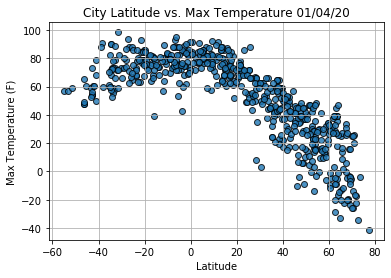

In [15]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

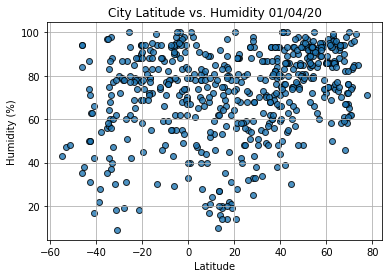

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

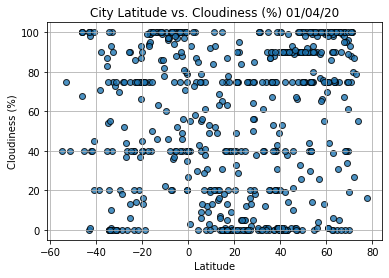

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

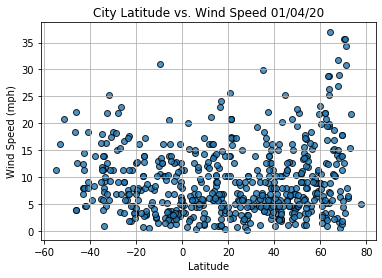

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [19]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [20]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Chokurdakh,RU,2020-01-04 17:55:21,70.62,147.90,-13.61,95,88,3.47
2,Lixourion,GR,2020-01-04 17:55:22,38.20,20.43,55.40,76,40,5.82
4,Sangar,RU,2020-01-04 17:55:22,63.92,127.47,-16.40,95,100,5.30
8,Portland,US,2020-01-04 17:55:23,43.66,-70.25,42.01,86,90,4.70
9,San Quintin,PH,2020-01-04 17:55:24,17.54,120.52,68.41,80,0,5.19
...,...,...,...,...,...,...,...,...,...
570,Kenai,US,2020-01-04 17:58:05,60.55,-151.26,-0.99,75,1,4.70
571,Leningradskiy,RU,2020-01-04 17:58:06,69.38,178.42,-9.13,61,61,1.90
572,Vostok,RU,2020-01-04 17:58:06,46.45,135.83,-10.25,97,91,4.70
573,Baruun-Urt,MN,2020-01-04 17:58:06,46.68,113.28,6.76,77,0,6.69


In [21]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [22]:

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

Linear Regression on the Northern Hemisphere for % Humidity


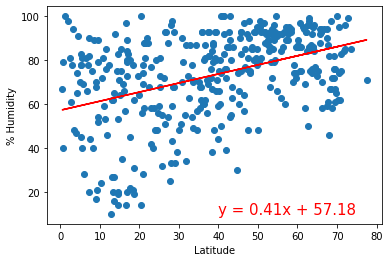

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values, print('Linear Regression on the Northern Hemisphere for % Humidity'), '% Humidity',(40,10))

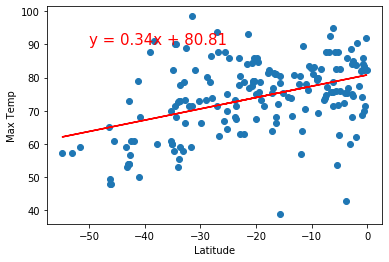

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

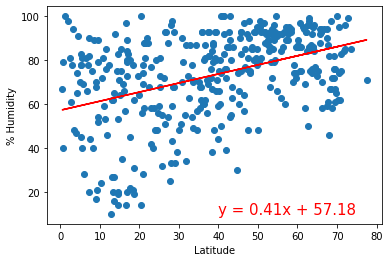

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

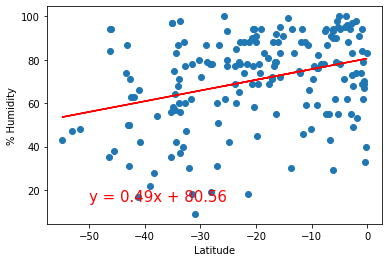

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

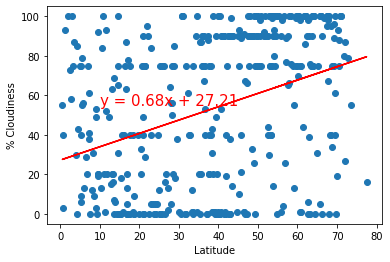

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values,
                   'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(10,55))

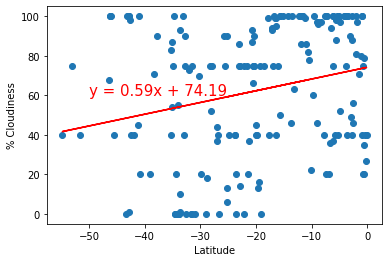

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

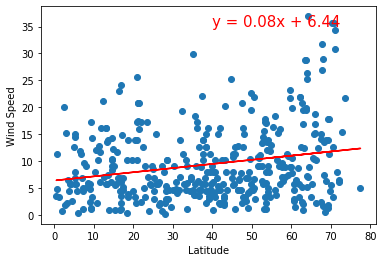

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

Linear Regression on the Southern Hemisphere for Wind Speed


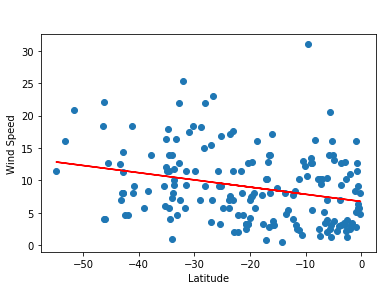

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       print('Linear Regression on the Southern Hemisphere for Wind Speed'), 'Wind Speed',(-50,35))